# 데이터 구성 확인하기

In [90]:
import requests 
import json 
 
danjiId=18433 
url = "https://apis.zigbang.com/property/apartments/{}/reviews/v1".format(danjiId) 
req = requests.get(url) 
 
if req.status_code == 200: 
    data = json.loads(req.text) 
    print(data)

{'summary': {'recommendScore': 4.2, 'trafficScore': 3.8, 'aroundScore': 3.8, 'residentScore': 4, 'careScore': 3.9, 'danjiName': '은평뉴타운상림마을7단지아이파크(706~708동)', 'reviewCount': 10}, 'data': [{'id': 380440, 'age': '50대', 'sex': '남자', 'married': '기혼', 'residenceTime': '2022년에 거주', 'residenceType': '자가 거주', 'score': 5, 'desc': '작은 평수는 아이를 키우는  젊은 직장인, 넓은 평수는 50대이상 경제적으로 안정된분들에게 추천드리고 싶습니다.', 'trafficScore': 5, 'trafficDesc': '아파트 앞에서 바로 버스로 한번에 구파발역 및 서울역까지 이용가능... 신분당선서북부 연장 확정시 근교에 진관중역을 이용 강남까지 30분이내 이동가능...', 'aroundScore': 5, 'aroundDesc': '초등학교부터 고등학교까지 초근접해 있으며 최고의 쾌적함과 도보로 북한산 및 둘레길 산책 가능함', 'careScore': 4, 'careDesc': '층수가 낮다보니 단지 넓이에 비해 세대수가 250세 정도로 작지만, 그만큼 쾌적할수 있고 안전이야 은평뉴타운 어느곳이든 안전하고 관리도 비교적 잘 되고 있음', 'residentScore': 4, 'residentDesc': '타입별 차이는 있겠으나, 내가 살고 있는 타입은 대형으로 층간 소음도 없고 단지내 여러 타입의 아파트가 조화롭게 구성됨...', 'regDate': '2022.07.21', 'regTime': '2022-07-21T02:45:54.000Z'}, {'id': 379583, 'age': '20대', 'sex': '남자', 'married': '미혼', 'residenceTime': '2022년에 거주', 'residenceType': '

In [91]:
!pip install geohash2

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [92]:
import requests 
import json 
import geohash2

gu = '완산구'
url = 'https://apis.zigbang.com/search?q={}'.format(gu)
req = requests.get(url)
_json = req.json()

print(_json)

{'success': True, 'code': '200', 'items': [{'id': 8396, 'type': 'address', 'name': '전주시 완산구', 'hint': '', 'description': '전라북도 전주시 완산구', 'lat': 35.812198638916, 'lng': 127.119812011719, 'zoom': 7, 'polygon': [], '_score': None, '_source': {'name_length': 7, 'local1': '전라북도', 'local2': '전주시 완산구', 'local3': None, 'web_level': 14, 'web_lat': 35.812198638916, 'web_lng': 127.119812011719, 'app_level': 13, 'app_lat': 35.812198638916, 'app_lng': 127.119812011719, '법정동코드': '4511100000'}, 'zoom_level': {'google': 13, 'daum': 6}, 'zoom_level_v2': {'app': 8, 'web': 6}}], 'next': None, 'limit': 0}


In [93]:
import geohash2

latitude = 35.81421
longitude = 127.1035

# geohash 계산
geohash_value = geohash2.encode(latitude, longitude)

print("전주시 완산구의 geohash:", geohash_value)

전주시 완산구의 geohash: wy67srcbyhwu


Geohash란?
GeoHash란 사각형의 격자구조를 이용하여 지구상의 위치를 고유하게 식별할 수 있는 고유 지리 ID입니다.

즉 임의의 장소에 대해 그 장소를 나타내는 고유의 ID가 있다는 뜻입니다.

In [100]:
def getHigherGeohash(strgh):        # string 형태의 geohash 입력시 상위 레벨의 geohash 32개를 리스트로 전달
    returnList=[]
    for i in range(10):
        returnList.append(strgh+str(i))
    startIdx = ord('b')
    endIdx = ord('z')
    for i in range(startIdx, endIdx + 1):
        if (chr(i) != 'i' and chr(i) != 'l' and chr(i) != 'o'):
            returnList.append(strgh + chr(i))
 
    return returnList

In [101]:
import requests
import json
 
def getDanjiList(geohash):
    url = "https://apis.zigbang.com/v2/aparts/items?domain=zigbang&geohash={}".format(geohash)
    req = requests.get(url)
    items = req.json()
 
    danjiList=[]
    if items["vrItems"] !=[]:       ## vrItems 대상이 있으면 진행
        for i in items["vrItems"]:
            danjiList.append(i["areaDanjiId"])
    if items["recommendItems"] !=[]:       ## recommend 대상이 있으면 진행
        for i in items["recommendItems"]:
            danjiList.append(i["areaDanjiId"])
    if items["items"] !=[]:       ## Items 대상이 있으면 진행
        for i in items["items"]:
            danjiList.append(i["areaDanjiId"])
 
    danjiList = list(set(danjiList))
 
 
    return danjiList


In [124]:
geohash = ['wydq0']
for i in geohash:
    print(getDanjiList(i))

[18433, 4451, 19493, 38598, 18729, 18731, 20142, 20143, 19889, 20402, 78680, 18740, 25750, 36888, 38269]


In [125]:
geohash = ['wy6']
tmp = []
for i in geohash:
    tmp4Lv=getHigherGeohash(i)
    for j in tmp4Lv:
        tmp5Lv=getHigherGeohash(j)
        tmp.append(tmp5Lv)
 
totalGeohash = []
for i in tmp:
    totalGeohash+=i
print(totalGeohash[:5], len(totalGeohash))

['wy600', 'wy601', 'wy602', 'wy603', 'wy604'] 1024


In [126]:
import requests
 
def getHigherGeohash(strgh):        # string 형태의 geohash 입력시 상위 레벨의 geohash 32개를 리스트로 전달
    returnList=[]
    for i in range(10):
        returnList.append(strgh+str(i))
    startIdx = ord('b')
    endIdx = ord('z')
    for i in range(startIdx, endIdx + 1):
        if (chr(i) != 'i' and chr(i) != 'l' and chr(i) != 'o'):
            returnList.append(strgh + chr(i))
 
    return returnList

In [127]:
def getDanjiList(geohash):
    url = "https://apis.zigbang.com/v2/aparts/items?domain=zigbang&geohash={}".format(geohash)
    req = requests.get(url)
    items = req.json()
 
    danjiList=[]
    if items["vrItems"] !=[]:       ## vrItems 대상이 있으면 진행
        for i in items["vrItems"]:
            danjiList.append(i["areaDanjiId"])
    if items["recommendItems"] !=[]:       ## recommend 대상이 있으면 진행
        for i in items["recommendItems"]:
            danjiList.append(i["areaDanjiId"])
    if items["items"] !=[]:       ## Items 대상이 있으면 진행
        for i in items["items"]:
            danjiList.append(i["areaDanjiId"])
 
    danjiList = list(set(danjiList))
 
 
    return danjiList

# 크롤링 후 csv 파일

# CSV 파일 만들기

이제 지오해시를 통하여 리뷰들에 대하여 크롤링 하여 csv 파일로 만드는 작업입니다.

In [131]:
geohash = ['wyd','wye','wy6','wy7']
tmp = []
for i in geohash:
    tmp4Lv=getHigherGeohash(i)
    for j in tmp4Lv:
        tmp5Lv=getHigherGeohash(j)
        tmp.append(tmp5Lv)
totalGeohash = []
for i in tmp:
    totalGeohash+=i
print(totalGeohash[:5], len(totalGeohash))

['wy600', 'wy601', 'wy602', 'wy603', 'wy604'] 1024


In [135]:
def makeCSV(geohashName, reviewList):
    fileName = geohashName + ".csv"
    f = open(fileName, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)
    for i in reviewList:
        wr.writerow(i)
    f.close()
    print(fileName+" has been created")

In [ ]:
geohash = ['wyd']
tmp = []
for i in geohash:
    tmp4Lv=getHigherGeohash(i)
    for j in tmp4Lv:
        tmp5Lv=getHigherGeohash(j)
        tmp.append(tmp5Lv)
totalGeohash = []
for i in tmp:
    totalGeohash+=i
for i in totalGeohash:
    DanjiListPerGeohash = getDanjiList(i)        # 5레벨 Geohash별로 처리
    reviewPerGeohash=[]
    for j in DanjiListPerGeohash:
        tmpList = getReviewData(j)
        if len(tmpList) > 0:
            for z in tmpList:
                reviewPerGeohash.append(z)
    if len(reviewPerGeohash) > 0:           # 해당 5레벨 geohash에 리뷰가 1개라도 있으면
        reviewPerGeohash.insert(0,["danji_id", "danji_name", "age", "sex", "residenceType", "married", "totalScore",
                        "totalDesc", "trafficScore", "trafficDesc", "aroundScore",
                        "aroundDesc", "careScore", "careDesc", "residentScore", "residentDesc"])
 
        makeCSV(i,reviewPerGeohash)
    else:                                   # 리뷰가 하나도 없으면
        print(i+" doesn't have any review data")

# 전체 코드

In [142]:
import requests
import json
import csv


def getSeoulAptId(geohash):
    url = "https://apis.zigbang.com/v2/aparts/items?domain=zigbang&geohash={}".format(geohash)
    req = requests.get(url)
    items = req.json()

    danjiList=[]
    if items["vrItems"] !=[]:       ## vrItems 대상이 있으면 진행
        for i in items["vrItems"]:
            danjiList.append(i["areaDanjiId"])
    if items["recommendItems"] !=[]:       ## recommend 대상이 있으면 진행
        for i in items["recommendItems"]:
            danjiList.append(i["areaDanjiId"])
    if items["items"] !=[]:       ## Items 대상이 있으면 진행
        for i in items["items"]:
            danjiList.append(i["areaDanjiId"])

    danjiList = list(set(danjiList))


    return danjiList

################################################################################################################
def getReviewData(danjiId):
    reviewList=[]

    url = "https://apis.zigbang.com/property/apartments/{}/reviews/v1".format(danjiId)
    req_review = requests.get(url)

    if req_review.status_code == 200:
        review_data = json.loads(req_review.text)
        if review_data["summary"]["reviewCount"] != 0:                  # 리뷰가 없는 아파트는 스킵
            for j in review_data["data"]:
                reviewList.append([danjiId, review_data["summary"]["danjiName"], j["age"], j["sex"],
                                    j["residenceType"], j["married"], j["score"], rmCR(j["desc"]), j["trafficScore"],
                                    rmCR(j["trafficDesc"]),
                                    j["aroundScore"], rmCR(j["aroundDesc"]), j["careScore"], rmCR(j["careDesc"]),
                                    j["residentScore"], rmCR(j["residentDesc"])])

    return reviewList

################################################################################################################
# 리뷰에 \r , \n이 있는 경우 삭제

def rmCR(text):
    while ("\n" in text or "\r" in text):
        text = text.replace("\n"," ")
        text = text.replace("\r", " ")
    return text

################################################################################################################

def makeCSV(geohashName, reviewList):
    fileName = geohashName + ".csv"
    f = open(fileName, 'w', encoding='utf-8', newline='')
    wr = csv.writer(f)
    for i in reviewList:
        wr.writerow(i)
    f.close()

################################################################################################################

seoulGeohash = ['wydq0','wydq4','wydq5','wydjz','wydmb','wydmc','wydmf','wydmg','wydmu','wydmv','wydjt',
                'wydjw','wydjx','wydm8','wydm9','wydmd','wydme','wydms','wydmt','wydmw','wydjq','wydjr',
                'wydm2','wydm3','wydm6','wydm7','wydmk','wydmm','wydjn','wydjp','wydm0','wydm1','wydm4',
                'wydm5','wydmh']

for i in seoulGeohash:
    AptListPerGeohash = getSeoulAptId(i)        # Geohash별로 처리
    reviewPerGeohash=[]
    for j in AptListPerGeohash:
        tmpList = getReviewData(j)
        if len(tmpList) > 0:
            for z in tmpList:
                reviewPerGeohash.append(z)

    # 컬럼이름 생성
    reviewPerGeohash.insert(0,["danji_id", "danji_name", "age", "sex", "residenceType", "married", "totalScore",
                        "totalDesc", "trafficScore", "trafficDesc", "aroundScore",
                        "aroundDesc", "careScore", "careDesc", "residentScore", "residentDesc"])

    makeCSV(i,reviewPerGeohash)
    print("Making CSV for " +i+" has been completed")

Making CSV for wydq0 has been completed
Making CSV for wydq4 has been completed
Making CSV for wydq5 has been completed
Making CSV for wydjz has been completed
Making CSV for wydmb has been completed
Making CSV for wydmc has been completed
Making CSV for wydmf has been completed
Making CSV for wydmg has been completed
Making CSV for wydmu has been completed
Making CSV for wydmv has been completed
Making CSV for wydjt has been completed
Making CSV for wydjw has been completed
Making CSV for wydjx has been completed
Making CSV for wydm8 has been completed
Making CSV for wydm9 has been completed
Making CSV for wydmd has been completed
Making CSV for wydme has been completed
Making CSV for wydms has been completed
Making CSV for wydmt has been completed
Making CSV for wydmw has been completed
Making CSV for wydjq has been completed
Making CSV for wydjr has been completed
Making CSV for wydm2 has been completed
Making CSV for wydm3 has been completed
Making CSV for wydm6 has been completed


# 데이터 통합 0과 1 인덱싱

In [147]:
# CSV 파일이 있는 폴더 경로
csv_folder = 'csv'

# 폴더 내의 모든 CSV 파일 가져오기
csv_files = [os.path.join(csv_folder, file) for file in os.listdir(csv_folder) if file.endswith(".csv")]

# 데이터 가져오기 및 처리
allData = getConcatData(csv_files)

# 결과를 파일로 저장 (옵션)
allData.to_csv("refinedData.csv", mode='w')

0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
1 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
2 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
1 of duplicated item has been deleted.
1 of duplicated item has been deleted.
2 of duplicated item has been deleted.
1 of duplicated item has been deleted.
1 of duplicated item has been deleted.
2 of duplicated item has been deleted.
1 of duplicated item has been deleted.
1 of duplicated item has been deleted.
0 of duplicated item has been deleted.
1 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
0 of duplicated item has been deleted.
1 of duplicated item has 

# 자연어 처리 순서

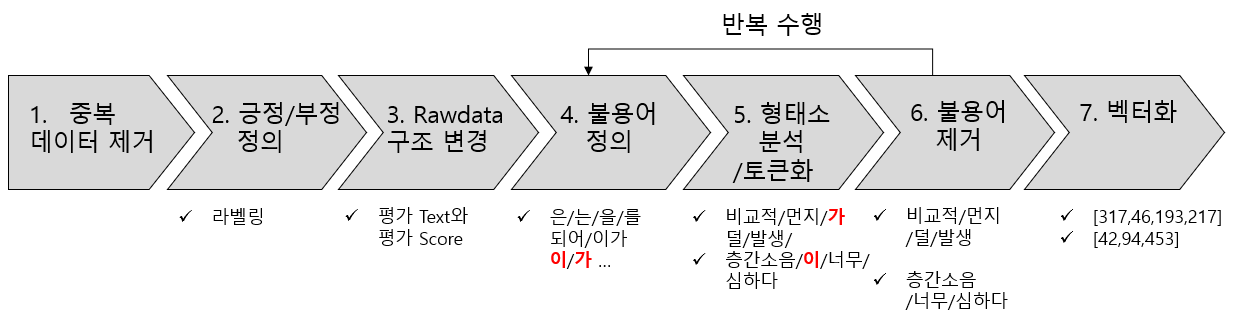

In [16]:
from IPython.display import Image
Image("img.png")

# 중복데이터 제거 , 긍정부정 정의 , Rawdata 구조 변경

In [36]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
import os
import csv


In [37]:
def getEncoding(tokenizer, splited_train_data, splited_test_data, y_train, y_test):

    encoded_train_data = tokenizer.texts_to_sequences(splited_train_data)
    encoded_test_data = tokenizer.texts_to_sequences(splited_test_data)

    drop_train = [i for i, v in enumerate(encoded_train_data) if len(v) == 0]
    drop_test = [i for i, v in enumerate(encoded_test_data) if len(v) == 0]

    encoded_train_data = np.delete(encoded_train_data, drop_train, axis=0)
    encoded_test_data = np.delete(encoded_test_data, drop_test, axis=0)

    print("\n")
    print("리뷰 최대길이: " , max(len(i) for i in encoded_train_data))
    print("리뷰 평균길이: " , sum(map(len, encoded_train_data))/len(encoded_train_data))
    cnt=sum([1 for i in encoded_train_data if len(i)<= 50])
    print("길이 50 이하의 비율: ", cnt/len(encoded_train_data)*100)
    
    plt.hist([len(s) for s in encoded_train_data], bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()

    
    encoded_train_data = pad_sequences(encoded_train_data, maxlen = 50)
    encoded_test_data = pad_sequences(encoded_test_data, maxlen = 50)

    Y_train = np.delete(y_train, drop_train, axis=0)
    Y_test = np.delete(y_test, drop_test, axis=0)
    print(str(len(drop_train)) + " of null review train data has been removed")
    print(str(len(drop_test)) + " of null review test data has been removed")

    return encoded_train_data, encoded_test_data, Y_train, Y_test

In [38]:
def getConcatData(inputList, csv_folder):
    returnDF = pd.DataFrame()
    for i in inputList:
        file_path = os.path.join(csv_folder, i + ".csv")
        tmp_data = pd.read_csv(file_path)
        tmp_data = getRawData(tmp_data)
        returnDF = pd.concat([returnDF, tmp_data])
    return returnDF

In [39]:
def getRawData(inputDF):

    # 중복 행 삭제
    cnt = len(inputDF)
    dupCnt=inputDF['totalDesc'].nunique()
    inputDF.drop_duplicates(subset=['totalDesc'], inplace=True)
    print( str(cnt - dupCnt) + " of duplicated item has been deleted.")

    # 필요없는 컬럼은 삭제
    inputDF.drop(["danji_id", "danji_name", "age", "sex", "residenceType", "married"], axis='columns', inplace=True)
    resultDF = pd.DataFrame()

    # 교통평가(3,4열) / 주변평가(5,6열) / 관리평가(7,8열), 주거평가(9,10열) 을 concat 하여 합침
    for i in range(0, 10, 2):
            inputDF.columns.values[i] = "score"
            inputDF.columns.values[i + 1] = "desc"
            resultDF = pd.concat([resultDF, inputDF.iloc[:, i:i + 2]])

    # 인덱스 재생성
    resultDF.reset_index(drop=True, inplace=True)

    # 긍정/부정 분류 (1~2 점은 부정, 3점은 제거, 4~5점은 긍정으로 분류)

    idx_nm = resultDF[resultDF['score'] == 3].index
    resultDF = resultDF.drop(idx_nm)
    resultDF["score"] = resultDF["score"].apply(lambda x: 1 if x >= 4 else 0)

    # resultDF.to_csv("resultDF.csv", mode='w')
    return resultDF

# 형태소 분석을 통해 토큰화 후 불용어를 제거 > 벡터화

In [40]:
def getTokenedData(input_data):

    input_data['desc'] = input_data['desc'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
    stopwordList = getStopwords()

    splited_input=[]
    okt = Okt()
    for i in input_data['desc']:
        temp_X =[]
        temp_X = okt.morphs(i, stem=True)
        temp_X = [j for j in temp_X if j not in stopwordList ]

        splited_input.append(temp_X)

    return splited_input

In [41]:
def getStopwords():
    file = open('stopwords.csv','r',encoding='utf8')
    csvfile = csv.reader(file)
    returnList = [i[0] for i in csvfile]

    return returnList[1:]

In [42]:
def getTokenizer(splited_train_data):

    # 희귀 단어 제외하여 훈련시킬 단어 개수 정하기
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(splited_train_data)

    rareCnt = 0
    rareFreq = 0
    totalCnt = len(tokenizer.word_counts)
    totalFreq = 0
    for k, v in tokenizer.word_counts.items():
        totalFreq += v
        if v < 3:
            rareCnt += 1
            rareFreq += v

    print("Whole words count:" + str(totalCnt))
    print("Words appear under two times or less:" + str(rareCnt))
    print("Appearance rate of rare words:" + str(rareCnt / totalCnt * 100))
    print("Appearance portion of rare words:" + str(rareFreq / totalFreq * 100))

    # 훈련을 위한 토큰화 수행
    vocabSize = totalCnt - rareCnt + 1
    print("Words for train:" + str(vocabSize))

    tokenizer = Tokenizer(vocabSize)
    tokenizer.fit_on_texts(splited_train_data)
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

    return tokenizer, vocabSize

In [43]:
import matplotlib.pyplot as plt

def plotScatter(X, Y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')
    plt.colorbar()
    plt.title("Scatter Plot of Encoded Text Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [44]:
def loadStopwords():
    # Specify the full path to the 'stopwords.csv' file
    stopwords_file_path = 'stopwords.csv'
    
    stopwords = []
    with open(stopwords_file_path, 'r', encoding='utf8') as file:
        csvfile = csv.reader(file)
        stopwords = [row[0] for row in csvfile]
    return stopwords[1:]

In [45]:
def tokenizeText(text):
    # Tokenize text using Okt (morphological analysis)
    okt = Okt()
    tokenized_text = []
    for sentence in text:
        tokens = okt.morphs(sentence, stem=True)
        tokenized_text.append(tokens)
    return tokenized_text

In [46]:
def removeStopwords(tokens, stopwords):
    # Remove stopwords from the list of tokens
    filtered_tokens = [[token for token in sentence if token not in stopwords] for sentence in tokens]
    return filtered_tokens

In [47]:
def createTokenizer(texts):
    # Create and fit a tokenizer on the given texts
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(texts)
    return tokenizer

# 메인

0 of duplicated item has been deleted.
0 of duplicated item has been deleted.


/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)




리뷰 최대길이:  122
리뷰 평균길이:  20.671262386902196
길이 50 이하의 비율:  97.2856527358897


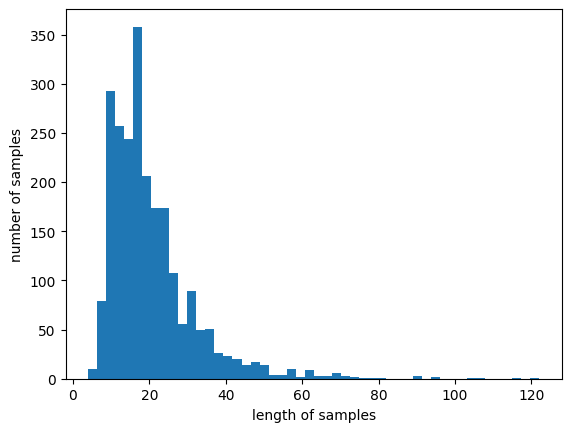

0 of null review train data has been removed
0 of null review test data has been removed
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    3  326    7   80    2   18   74    1  504  244  408  385 1281
     3  924  351   35   18 1013   24  306]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   57  505  362  327  240  328  925  684
   352  926  245 1282  927  506  730  603   44  573   57  134  241   75
   232  245  193  287  507   16  685  731]
 [1014 1511   14  268  574  153    2  205  931   23  242   84  233  164
   214   21  257  205   22  129   24   86  129  222  307   50  375   89
    58   89   27   19  454   27   19  167   10  240  269    1  351   35
   510   19    3   75    1  177   50   79]]
[[   0    0    0    0  126   13  676  382   46   11    2   29  567   43
   138   43   28  420   64   31  153   26    2  420   51   84

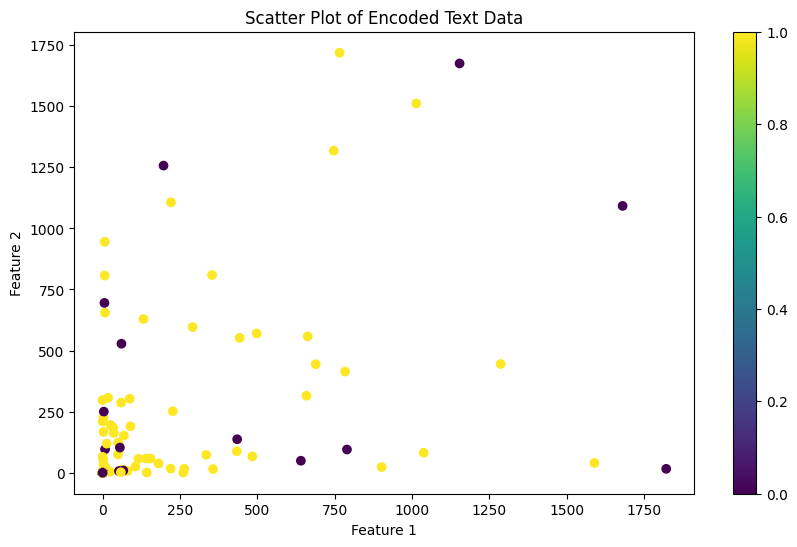

In [49]:
# CSV 파일이 있는 폴더 경로
csv_folder = "csv"

# 훈련 및 테스트 데이터의 파일 이름 목록
train_geohash = ['wydm0']
test_geohash = ['wydjn']

# 1. Raw 데이터 생성
train_data = getConcatData(train_geohash, csv_folder)
test_data = getConcatData(test_geohash, csv_folder)
y_train = np.array(train_data['score'])
y_test = np.array(test_data['score'])

# 2. 불용어 적용 및 Token처리
splited_train_data = getTokenedData(train_data)
splited_test_data= getTokenedData(test_data)

# 3. Tokenizer 생성 (만약 저장된 파일이 있으면 이 파일을 읽음, 새로 만드려면 지울 것)
tokenizer = Tokenizer()

if (os.path.exists("tokenizer.pickle")):
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)
else:
    tokenizer = getTokenizer(splited_train_data)

# 4. 벡터화된 데이터 생성
X_train, X_test, Y_train, Y_test = getEncoding(tokenizer, splited_train_data, splited_test_data, y_train, y_test)


print(X_train[:1])

print(X_test[:3])

print(Y_train[:3])

print(Y_test[:3])

plotScatter(X_train[:, :2], Y_train)

# Keras 모델 생성

In [50]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [51]:
vocabSize = 5000  # 어휘 크기 설정
model = Sequential()
model.add(Embedding(vocabSize,100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
filepath = ''
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)


Epoch 1/15
31/31 [==============================] - ETA: 0s - loss: 0.5424 - acc: 0.7839INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


31/31 [==============================] - 12s 332ms/step - loss: 0.5424 - acc: 0.7839 - val_loss: 0.4645 - val_acc: 0.8430
Epoch 2/15
31/31 [==============================] - ETA: 0s - loss: 0.5033 - acc: 0.7931INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


31/31 [==============================] - 6s 182ms/step - loss: 0.5033 - acc: 0.7931 - val_loss: 0.4483 - val_acc: 0.8430
Epoch 3/15
31/31 [==============================] - ETA: 0s - loss: 0.4351 - acc: 0.8120INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


31/31 [==============================] - 6s 197ms/step - loss: 0.4351 - acc: 0.8120 - val_loss: 0.4099 - val_acc: 0.8452
Epoch 4/15
29/31 [===========================>..] - ETA: 0s - loss: 0.3639 - acc: 0.8466INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


31/31 [==============================] - 5s 152ms/step - loss: 0.3634 - acc: 0.8486 - val_loss: 0.4411 - val_acc: 0.8000
Epoch 5/15
30/31 [============================>.] - ETA: 0s - loss: 0.3241 - acc: 0.8683INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


31/31 [==============================] - 5s 159ms/step - loss: 0.3204 - acc: 0.8696 - val_loss: 0.4268 - val_acc: 0.8172
Epoch 6/15
31/31 [==============================] - ETA: 0s - loss: 0.2650 - acc: 0.8917INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


31/31 [==============================] - 4s 127ms/step - loss: 0.2650 - acc: 0.8917 - val_loss: 0.4601 - val_acc: 0.7978
Epoch 7/15
28/31 [==========================>...] - ETA: 0s - loss: 0.2362 - acc: 0.9131INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


31/31 [==============================] - 4s 143ms/step - loss: 0.2425 - acc: 0.9116 - val_loss: 0.4793 - val_acc: 0.7763
Epoch 7: early stopping


Text(0.5, 0, 'Epochs')

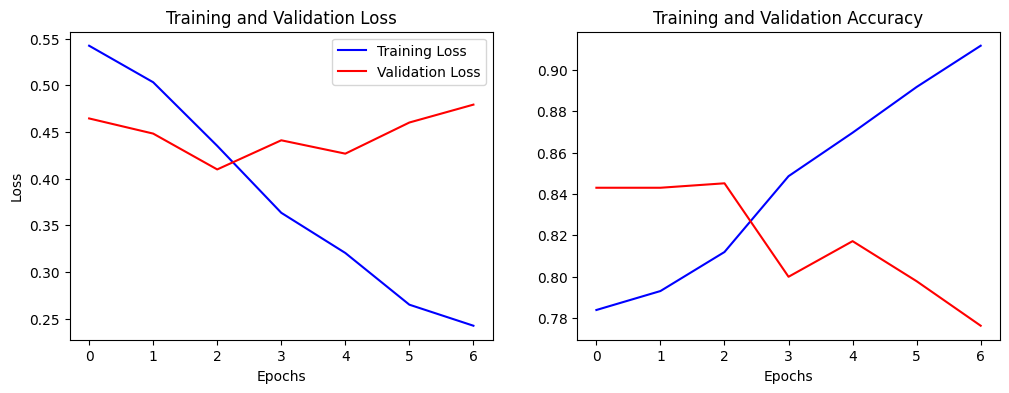

In [52]:
# 훈련 이력에서 손실과 정확도 추출
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
# 훈련 및 검증 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, 'b', label='Training Loss')
plt.plot(val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# 훈련 및 검증 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(acc, 'b', label='Training Accuracy')
plt.plot(val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')

In [67]:
model.predict(X_train[:1]) # 긍정 이였음

1/1 [==============================] - 0s 43ms/step


array([[0.9955521]], dtype=float32)

In [72]:
# 예측할 텍스트
input_text = ["집이 너무 더럽고 냄새나고 기분이 안좋아요 마음에 안들고 어떻게 해야될지 모르겠네요",
              "집이 너무나 깔끔하고 좋아요 최고에요 역세권인점도 마음에 들고 최고에요 정말 사랑스러워요"]

# 텍스트를 토큰화하고 패딩
max_sequence_length = max([len(seq) for seq in X_train])

# 결과를 저장할 리스트 초기화
input_sequences = []
predicted_values = []

# 각 입력 텍스트에 대한 처리
for text in input_text:
    # 텍스트를 시퀀스로 변환하고 패딩 적용
    input_sequence = tokenizer.texts_to_sequences([text])
    input_sequence = pad_sequences(input_sequence, maxlen=max_sequence_length)
    
    # 모델에 입력하여 예측
    predicted_value = model.predict(input_sequence)
    
    # 예측 결과와 입력 시퀀스를 리스트에 추가
    predicted_values.append(predicted_value)
    input_sequences.append(input_sequence)

# 입력 시퀀스와 예측 결과 출력
for i in range(len(input_text)):
    print("입력 시퀀스:")
    print(input_sequences[i])
    print("예측 결과:")
    print(predicted_values[i])
    print()

1/1 [==============================] - 0s 40ms/step
입력 시퀀스:
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0 59]]
예측 결과:
[[0.50390315]]

입력 시퀀스:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 1377  100]]
예측 결과:
[[0.59576666]]

